In this notebook, we read the 'lif' files that resulted from manual annotation in labelIMG. They provide a bounding box that marks the 'OS' in the image. We want to use these as input for a classifier that segments the OS. We could generate a train data set by making patches that are centered around the center of the bbox, and patches that are completely outside of the bbox. The resulting classifier can classify a pixel by looking at the patch around it. This gives 'heatmap' of os-iness of the pixels. Hopefully we can take the maximum of the heatmap as the center of OS.

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import os
import cv2

In [19]:
lif_path = '/media/sf_VBox_Shared/kaggle/cervical-cancer/labels/'
image_path = '/media/sf_VBox_Shared/kaggle/cervical-cancer/processed/'
types = ['Type_1', 'Type_2', 'Type_3']

In [ ]:
def get_bbox(path):
    with open(path, 'r') as f:
        soup = BeautifulSoup(f, 'lxml')
        box = soup.find('bndbox')
        keys = ['xmin', 'xmax', 'ymin', 'ymax']
        return {key:int(box.find(key).contents[0]) for key in keys}

In [60]:
bboxes = []
for typ in types:
    for fn in os.listdir(os.path.join(lif_path, typ)):
        bbox = get_bbox(os.path.join(lif_path, typ, fn))
        bbox['width'] = bbox['xmax'] - bbox['xmin']
        bbox['height'] = bbox['ymax'] - bbox['ymin']
        bbox['area'] = bbox['width'] * bbox['height']

        fn_image = fn.replace('.lif', '.jpg')
        img = cv2.imread(os.path.join(image_path, typ, fn_image))
        w, h, c = img.shape
        bbox['img_dim'] = (w, h, c)
        bbox['rel_xmin'] = bbox['xmin'] / float(w)
        bbox['rel_xmax'] = bbox['xmax'] / float(w)
        bbox['rel_ymin'] = bbox['ymin'] / float(h)
        bbox['rel_ymax'] = bbox['ymax'] / float(h)
        bbox['rel_width'] = bbox['rel_xmax'] - bbox['rel_xmin']
        bbox['rel_height'] = bbox['rel_ymax'] - bbox['rel_ymin']
        bboxes.append(bbox)

In [61]:
import pandas as pd
bboxes_df = pd.DataFrame(bboxes)

In [62]:
bboxes_df.head()

,area,height,img_dim,rel_height,rel_width,rel_xmax,rel_xmin,rel_ymax,rel_ymin,width,xmax,xmin,ymax,ymin
0,1950,39,"(256, 251, 3)",0.155378,0.195312,0.710938,0.515625,0.541833,0.386454,50,182,132,136,97
1,3366,33,"(202, 256, 3)",0.128906,0.504950,0.990099,0.485149,0.574219,0.445312,102,200,98,147,114
2,903,21,"(256, 205, 3)",0.102439,0.167969,0.339844,0.171875,0.741463,0.639024,43,87,44,152,131
3,1340,20,"(256, 165, 3)",0.121212,0.261719,0.437500,0.175781,0.793939,0.672727,67,112,45,131,111
4,2581,29,"(243, 256, 3)",0.113281,0.366255,0.650206,0.283951,0.621094,0.507812,89,158,69,159,130


('min:', width     10
height    12
dtype: int64)
('max:', width     157
height     97
dtype: int64)


/home/dafne/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


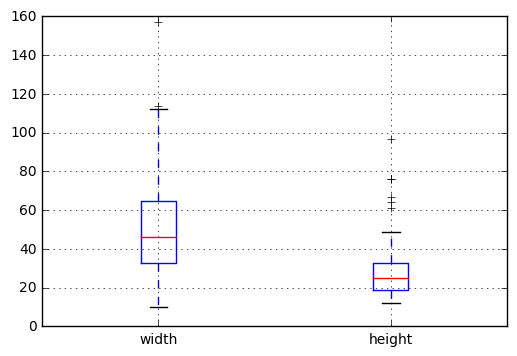

/home/dafne/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


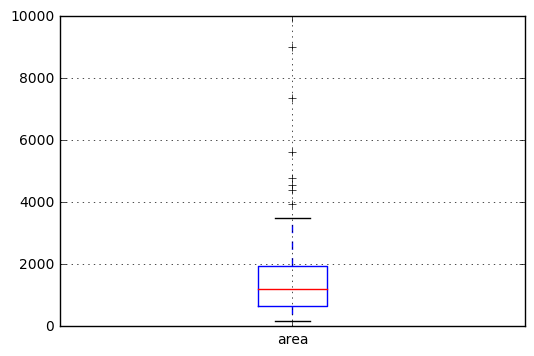

In [63]:
print('min:', bboxes_df[['width', 'height']].min())
print('max:', bboxes_df[['width', 'height']].max())
bboxes_df[['width', 'height']].boxplot();
plt.show()
bboxes_df[['area']].boxplot();
plt.show()

('min:', rel_width     0.039062
rel_height    0.046875
dtype: float64)
('max:', rel_width     0.613281
rel_height    0.427313
dtype: float64)


/home/dafne/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


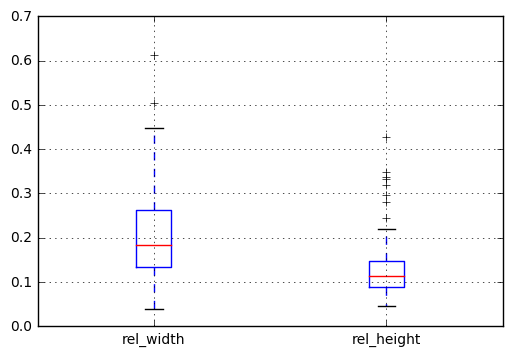

In [64]:
print('min:', bboxes_df[['rel_width', 'rel_height']].min())
print('max:', bboxes_df[['rel_width', 'rel_height']].max())
bboxes_df[['rel_width', 'rel_height']].boxplot();
plt.show()

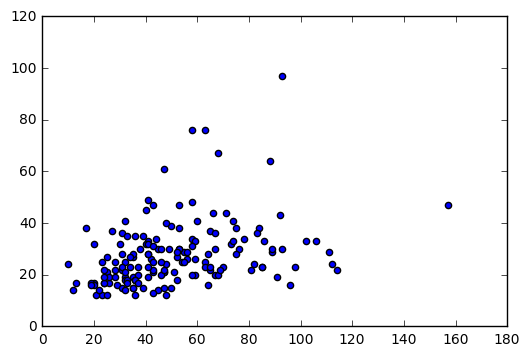

In [65]:
plt.scatter(bboxes_df['width'], bboxes_df['height'])

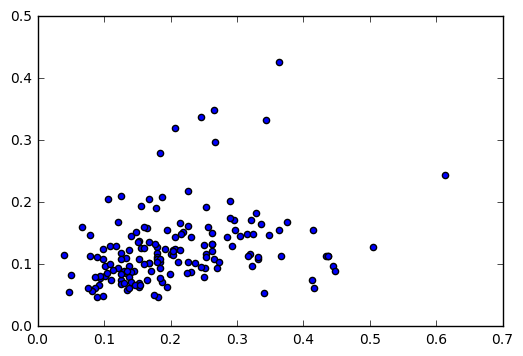

In [66]:
plt.scatter(bboxes_df['rel_width'], bboxes_df['rel_height'])

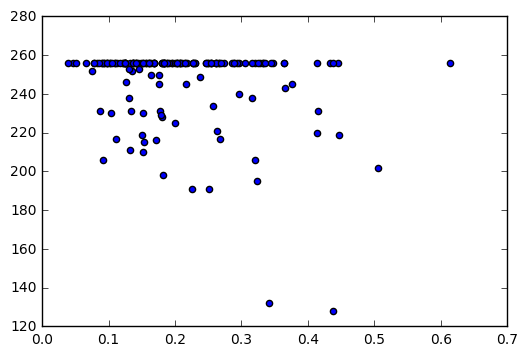

In [69]:
plt.scatter(bboxes_df['rel_width'], [d[0] for d in bboxes_df['img_dim']])

In [10]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [46]:
img.shape

(202, 256, 3)

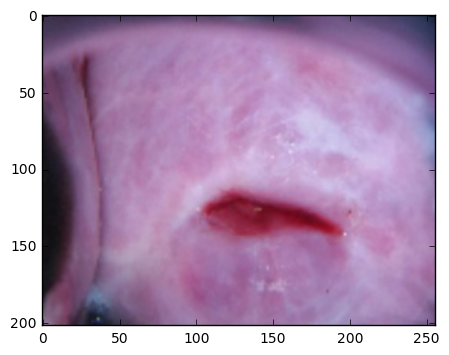

In [11]:
plt.imshow(img)

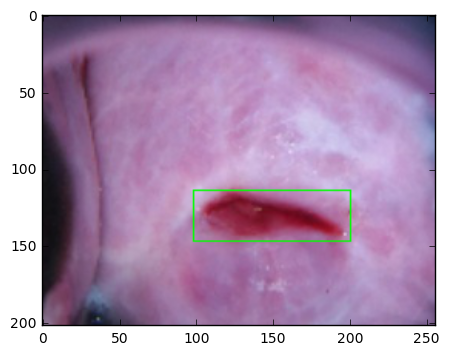

In [18]:
rect_img = cv2.rectangle(img, (bbox['xmin'], bbox['ymin']), (bbox['xmax'], bbox['ymax']), (0, 255, 0))
plt.imshow(rect_img)